In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CCEP
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


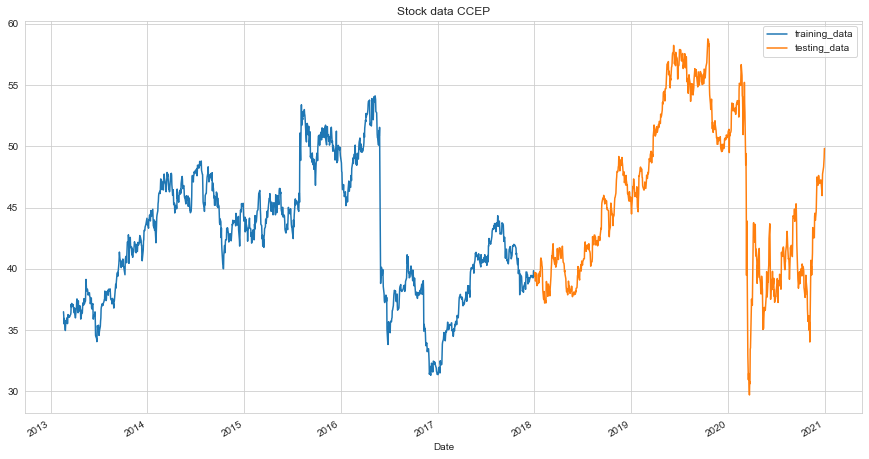

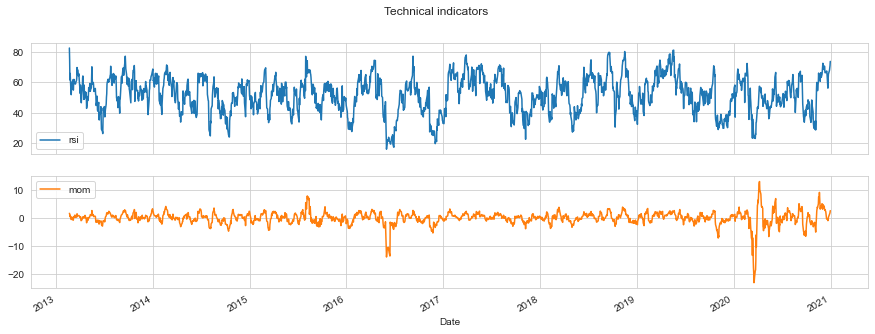

In [2]:
stock_name = 'ccep'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1201.26, duration: 0:00:00.279064
episode: 2/2000, episode end value: 1142.46, duration: 0:00:00.266060
episode: 3/2000, episode end value: 1082.08, duration: 0:00:00.233049
episode: 4/2000, episode end value: 1195.63, duration: 0:00:00.266061
episode: 5/2000, episode end value: 1151.93, duration: 0:00:00.251070
episode: 6/2000, episode end value: 1160.41, duration: 0:00:00.241056
episode: 7/2000, episode end value: 1237.39, duration: 0:00:00.245069
episode: 8/2000, episode end value: 1192.66, duration: 0:00:00.253056
episode: 9/2000, episode end value: 1175.06, duration: 0:00:00.248073
episode: 10/2000, episode end value: 1230.73, duration: 0:00:00.250042
episode: 11/2000, episode end value: 1243.87, duration: 0:00:00.237065
episode: 12/2000, episode end value: 1203.64, duration: 0:00:00.228051
episode: 13/2000, episode end value: 1244.70, duration: 0:00:00.237039
episode: 14/2000, episode end value: 1217.34, duration: 0:00:00.232066
episode: 15/200

episode: 117/2000, episode end value: 1250.76, duration: 0:00:00.260058
episode: 118/2000, episode end value: 1221.87, duration: 0:00:00.273059
episode: 119/2000, episode end value: 1207.71, duration: 0:00:00.261059
episode: 120/2000, episode end value: 1213.54, duration: 0:00:00.290067
episode: 121/2000, episode end value: 1215.47, duration: 0:00:00.293068
episode: 122/2000, episode end value: 1213.46, duration: 0:00:00.257071
episode: 123/2000, episode end value: 1208.25, duration: 0:00:00.257044
episode: 124/2000, episode end value: 1251.49, duration: 0:00:00.247056
episode: 125/2000, episode end value: 1200.85, duration: 0:00:00.265060
episode: 126/2000, episode end value: 1204.93, duration: 0:00:00.255057
episode: 127/2000, episode end value: 1196.38, duration: 0:00:00.266058
episode: 128/2000, episode end value: 1220.25, duration: 0:00:00.264061
episode: 129/2000, episode end value: 1203.17, duration: 0:00:00.251057
episode: 130/2000, episode end value: 1215.78, duration: 0:00:00

episode: 231/2000, episode end value: 1235.48, duration: 0:00:00.344073
episode: 232/2000, episode end value: 1198.96, duration: 0:00:00.386088
episode: 233/2000, episode end value: 1248.33, duration: 0:00:00.320071
episode: 234/2000, episode end value: 1201.46, duration: 0:00:00.446102
episode: 235/2000, episode end value: 1213.57, duration: 0:00:00.393090
episode: 236/2000, episode end value: 1266.90, duration: 0:00:00.471105
episode: 237/2000, episode end value: 1233.37, duration: 0:00:00.421089
episode: 238/2000, episode end value: 1231.03, duration: 0:00:00.449101
episode: 239/2000, episode end value: 1220.66, duration: 0:00:00.518117
episode: 240/2000, episode end value: 1258.44, duration: 0:00:00.493110
episode: 241/2000, episode end value: 1223.95, duration: 0:00:00.403087
episode: 242/2000, episode end value: 1237.05, duration: 0:00:00.453100
episode: 243/2000, episode end value: 1210.48, duration: 0:00:00.368085
episode: 244/2000, episode end value: 1215.28, duration: 0:00:00

episode: 345/2000, episode end value: 1232.31, duration: 0:00:00.479111
episode: 346/2000, episode end value: 1196.44, duration: 0:00:00.486108
episode: 347/2000, episode end value: 1254.31, duration: 0:00:00.459103
episode: 348/2000, episode end value: 1246.66, duration: 0:00:00.365082
episode: 349/2000, episode end value: 1206.88, duration: 0:00:00.442097
episode: 350/2000, episode end value: 1212.79, duration: 0:00:00.511115
episode: 351/2000, episode end value: 1244.74, duration: 0:00:00.447101
episode: 352/2000, episode end value: 1227.32, duration: 0:00:00.413096
episode: 353/2000, episode end value: 1226.02, duration: 0:00:00.411091
episode: 354/2000, episode end value: 1208.28, duration: 0:00:00.527118
episode: 355/2000, episode end value: 1245.57, duration: 0:00:00.464110
episode: 356/2000, episode end value: 1247.44, duration: 0:00:00.451096
episode: 357/2000, episode end value: 1226.59, duration: 0:00:00.442103
episode: 358/2000, episode end value: 1233.23, duration: 0:00:00

episode: 459/2000, episode end value: 1198.73, duration: 0:00:00.509115
episode: 460/2000, episode end value: 1221.09, duration: 0:00:00.459102
episode: 461/2000, episode end value: 1204.92, duration: 0:00:00.413097
episode: 462/2000, episode end value: 1215.95, duration: 0:00:00.429094
episode: 463/2000, episode end value: 1257.75, duration: 0:00:00.439103
episode: 464/2000, episode end value: 1236.71, duration: 0:00:00.533115
episode: 465/2000, episode end value: 1198.52, duration: 0:00:00.441105
episode: 466/2000, episode end value: 1214.16, duration: 0:00:00.378078
episode: 467/2000, episode end value: 1229.16, duration: 0:00:00.402093
episode: 468/2000, episode end value: 1248.19, duration: 0:00:00.500108
episode: 469/2000, episode end value: 1250.49, duration: 0:00:00.395089
episode: 470/2000, episode end value: 1230.09, duration: 0:00:00.400091
episode: 471/2000, episode end value: 1221.14, duration: 0:00:00.434103
episode: 472/2000, episode end value: 1216.92, duration: 0:00:00

episode: 573/2000, episode end value: 1232.69, duration: 0:00:00.423089
episode: 574/2000, episode end value: 1199.34, duration: 0:00:00.470109
episode: 575/2000, episode end value: 1223.81, duration: 0:00:00.420094
episode: 576/2000, episode end value: 1243.18, duration: 0:00:00.429096
episode: 577/2000, episode end value: 1209.96, duration: 0:00:00.517119
episode: 578/2000, episode end value: 1218.39, duration: 0:00:00.442102
episode: 579/2000, episode end value: 1202.57, duration: 0:00:00.402088
episode: 580/2000, episode end value: 1208.61, duration: 0:00:00.518117
episode: 581/2000, episode end value: 1201.38, duration: 0:00:00.502112
episode: 582/2000, episode end value: 1210.49, duration: 0:00:00.420096
episode: 583/2000, episode end value: 1208.59, duration: 0:00:00.473107
episode: 584/2000, episode end value: 1225.77, duration: 0:00:00.469109
episode: 585/2000, episode end value: 1218.37, duration: 0:00:00.471104
episode: 586/2000, episode end value: 1217.94, duration: 0:00:00

episode: 687/2000, episode end value: 1220.53, duration: 0:00:00.410088
episode: 688/2000, episode end value: 1219.64, duration: 0:00:00.429100
episode: 689/2000, episode end value: 1245.59, duration: 0:00:00.481103
episode: 690/2000, episode end value: 1248.15, duration: 0:00:00.496113
episode: 691/2000, episode end value: 1199.58, duration: 0:00:00.415093
episode: 692/2000, episode end value: 1245.38, duration: 0:00:00.425094
episode: 693/2000, episode end value: 1220.93, duration: 0:00:00.473106
episode: 694/2000, episode end value: 1257.07, duration: 0:00:00.466110
episode: 695/2000, episode end value: 1203.08, duration: 0:00:00.415089
episode: 696/2000, episode end value: 1241.04, duration: 0:00:00.402089
episode: 697/2000, episode end value: 1204.69, duration: 0:00:00.451099
episode: 698/2000, episode end value: 1209.01, duration: 0:00:00.487109
episode: 699/2000, episode end value: 1219.64, duration: 0:00:00.411099
episode: 700/2000, episode end value: 1235.66, duration: 0:00:00

episode: 801/2000, episode end value: 1209.11, duration: 0:00:00.492107
episode: 802/2000, episode end value: 1239.24, duration: 0:00:00.496113
episode: 803/2000, episode end value: 1198.66, duration: 0:00:00.426098
episode: 804/2000, episode end value: 1237.72, duration: 0:00:00.471105
episode: 805/2000, episode end value: 1214.68, duration: 0:00:00.480107
episode: 806/2000, episode end value: 1214.13, duration: 0:00:00.462106
episode: 807/2000, episode end value: 1234.68, duration: 0:00:00.355078
episode: 808/2000, episode end value: 1227.80, duration: 0:00:00.476106
episode: 809/2000, episode end value: 1230.60, duration: 0:00:00.434099
episode: 810/2000, episode end value: 1229.14, duration: 0:00:00.422097
episode: 811/2000, episode end value: 1215.32, duration: 0:00:00.457100
episode: 812/2000, episode end value: 1229.44, duration: 0:00:00.421092
episode: 813/2000, episode end value: 1233.70, duration: 0:00:00.406090
episode: 814/2000, episode end value: 1222.87, duration: 0:00:00

episode: 915/2000, episode end value: 1198.02, duration: 0:00:00.441099
episode: 916/2000, episode end value: 1230.34, duration: 0:00:00.445100
episode: 917/2000, episode end value: 1228.22, duration: 0:00:00.432097
episode: 918/2000, episode end value: 1222.47, duration: 0:00:00.406092
episode: 919/2000, episode end value: 1215.57, duration: 0:00:00.464105
episode: 920/2000, episode end value: 1218.04, duration: 0:00:00.437097
episode: 921/2000, episode end value: 1222.82, duration: 0:00:00.469106
episode: 922/2000, episode end value: 1240.82, duration: 0:00:00.481109
episode: 923/2000, episode end value: 1255.86, duration: 0:00:00.451098
episode: 924/2000, episode end value: 1200.18, duration: 0:00:00.461106
episode: 925/2000, episode end value: 1206.59, duration: 0:00:00.440096
episode: 926/2000, episode end value: 1208.56, duration: 0:00:00.507117
episode: 927/2000, episode end value: 1213.63, duration: 0:00:00.501108
episode: 928/2000, episode end value: 1217.24, duration: 0:00:00

episode: 1029/2000, episode end value: 1208.04, duration: 0:00:00.489107
episode: 1030/2000, episode end value: 1214.39, duration: 0:00:00.478106
episode: 1031/2000, episode end value: 1222.11, duration: 0:00:00.381087
episode: 1032/2000, episode end value: 1225.46, duration: 0:00:00.452100
episode: 1033/2000, episode end value: 1212.41, duration: 0:00:00.477105
episode: 1034/2000, episode end value: 1238.02, duration: 0:00:00.501116
episode: 1035/2000, episode end value: 1215.88, duration: 0:00:00.469108
episode: 1036/2000, episode end value: 1236.34, duration: 0:00:00.476107
episode: 1037/2000, episode end value: 1253.41, duration: 0:00:00.452098
episode: 1038/2000, episode end value: 1223.63, duration: 0:00:00.417098
episode: 1039/2000, episode end value: 1224.04, duration: 0:00:00.443100
episode: 1040/2000, episode end value: 1258.57, duration: 0:00:00.451102
episode: 1041/2000, episode end value: 1223.87, duration: 0:00:00.394091
episode: 1042/2000, episode end value: 1209.10, dur

episode: 1142/2000, episode end value: 1218.03, duration: 0:00:00.507113
episode: 1143/2000, episode end value: 1277.63, duration: 0:00:00.460107
episode: 1144/2000, episode end value: 1219.45, duration: 0:00:00.397085
episode: 1145/2000, episode end value: 1237.55, duration: 0:00:00.476106
episode: 1146/2000, episode end value: 1227.59, duration: 0:00:00.428096
episode: 1147/2000, episode end value: 1212.58, duration: 0:00:00.421093
episode: 1148/2000, episode end value: 1215.24, duration: 0:00:00.430098
episode: 1149/2000, episode end value: 1234.17, duration: 0:00:00.483103
episode: 1150/2000, episode end value: 1212.02, duration: 0:00:00.444101
episode: 1151/2000, episode end value: 1237.40, duration: 0:00:00.461103
episode: 1152/2000, episode end value: 1234.96, duration: 0:00:00.440105
episode: 1153/2000, episode end value: 1199.00, duration: 0:00:00.443105
episode: 1154/2000, episode end value: 1208.40, duration: 0:00:00.423094
episode: 1155/2000, episode end value: 1227.37, dur

episode: 1255/2000, episode end value: 1221.28, duration: 0:00:00.515117
episode: 1256/2000, episode end value: 1214.01, duration: 0:00:00.503112
episode: 1257/2000, episode end value: 1220.89, duration: 0:00:00.446101
episode: 1258/2000, episode end value: 1216.21, duration: 0:00:00.413097
episode: 1259/2000, episode end value: 1224.78, duration: 0:00:00.427094
episode: 1260/2000, episode end value: 1203.50, duration: 0:00:00.444104
episode: 1261/2000, episode end value: 1206.70, duration: 0:00:00.487107
episode: 1262/2000, episode end value: 1219.02, duration: 0:00:00.366083
episode: 1263/2000, episode end value: 1206.21, duration: 0:00:00.388086
episode: 1264/2000, episode end value: 1215.66, duration: 0:00:00.494110
episode: 1265/2000, episode end value: 1206.51, duration: 0:00:00.525123
episode: 1266/2000, episode end value: 1229.81, duration: 0:00:00.410087
episode: 1267/2000, episode end value: 1241.31, duration: 0:00:00.377092
episode: 1268/2000, episode end value: 1196.14, dur

episode: 1368/2000, episode end value: 1230.49, duration: 0:00:00.415096
episode: 1369/2000, episode end value: 1220.26, duration: 0:00:00.399086
episode: 1370/2000, episode end value: 1213.70, duration: 0:00:00.373085
episode: 1371/2000, episode end value: 1220.13, duration: 0:00:00.439097
episode: 1372/2000, episode end value: 1246.20, duration: 0:00:00.446101
episode: 1373/2000, episode end value: 1237.26, duration: 0:00:00.460103
episode: 1374/2000, episode end value: 1228.89, duration: 0:00:00.384081
episode: 1375/2000, episode end value: 1208.94, duration: 0:00:00.492111
episode: 1376/2000, episode end value: 1200.23, duration: 0:00:00.475107
episode: 1377/2000, episode end value: 1199.77, duration: 0:00:00.474110
episode: 1378/2000, episode end value: 1227.30, duration: 0:00:00.395084
episode: 1379/2000, episode end value: 1216.62, duration: 0:00:00.509115
episode: 1380/2000, episode end value: 1207.76, duration: 0:00:00.446097
episode: 1381/2000, episode end value: 1231.68, dur

episode: 1481/2000, episode end value: 1223.54, duration: 0:00:00.422096
episode: 1482/2000, episode end value: 1234.07, duration: 0:00:00.440099
episode: 1483/2000, episode end value: 1226.25, duration: 0:00:00.475111
episode: 1484/2000, episode end value: 1217.95, duration: 0:00:00.509111
episode: 1485/2000, episode end value: 1203.67, duration: 0:00:00.449102
episode: 1486/2000, episode end value: 1206.61, duration: 0:00:00.415093
episode: 1487/2000, episode end value: 1227.71, duration: 0:00:00.422096
episode: 1488/2000, episode end value: 1253.75, duration: 0:00:00.489111
episode: 1489/2000, episode end value: 1217.53, duration: 0:00:00.431095
episode: 1490/2000, episode end value: 1209.96, duration: 0:00:00.411092
episode: 1491/2000, episode end value: 1236.26, duration: 0:00:00.479105
episode: 1492/2000, episode end value: 1220.00, duration: 0:00:00.449100
episode: 1493/2000, episode end value: 1202.33, duration: 0:00:00.447099
episode: 1494/2000, episode end value: 1238.49, dur

episode: 1594/2000, episode end value: 1215.57, duration: 0:00:00.380081
episode: 1595/2000, episode end value: 1221.35, duration: 0:00:00.392087
episode: 1596/2000, episode end value: 1204.86, duration: 0:00:00.438098
episode: 1597/2000, episode end value: 1219.83, duration: 0:00:00.423094
episode: 1598/2000, episode end value: 1215.22, duration: 0:00:00.407091
episode: 1599/2000, episode end value: 1206.80, duration: 0:00:00.402090
episode: 1600/2000, episode end value: 1220.57, duration: 0:00:00.479107
episode: 1601/2000, episode end value: 1250.03, duration: 0:00:00.475108
episode: 1602/2000, episode end value: 1220.94, duration: 0:00:00.424094
episode: 1603/2000, episode end value: 1199.90, duration: 0:00:00.408093
episode: 1604/2000, episode end value: 1214.52, duration: 0:00:00.504113
episode: 1605/2000, episode end value: 1248.49, duration: 0:00:00.420097
episode: 1606/2000, episode end value: 1216.99, duration: 0:00:00.456102
episode: 1607/2000, episode end value: 1210.41, dur

episode: 1707/2000, episode end value: 1227.80, duration: 0:00:00.376083
episode: 1708/2000, episode end value: 1238.53, duration: 0:00:00.354079
episode: 1709/2000, episode end value: 1215.57, duration: 0:00:00.395087
episode: 1710/2000, episode end value: 1217.94, duration: 0:00:00.419097
episode: 1711/2000, episode end value: 1226.96, duration: 0:00:00.437095
episode: 1712/2000, episode end value: 1200.63, duration: 0:00:00.382087
episode: 1713/2000, episode end value: 1208.48, duration: 0:00:00.367081
episode: 1714/2000, episode end value: 1220.02, duration: 0:00:00.467104
episode: 1715/2000, episode end value: 1228.35, duration: 0:00:00.345078
episode: 1716/2000, episode end value: 1218.58, duration: 0:00:00.359081
episode: 1717/2000, episode end value: 1225.56, duration: 0:00:00.395088
episode: 1718/2000, episode end value: 1208.18, duration: 0:00:00.391087
episode: 1719/2000, episode end value: 1222.03, duration: 0:00:00.385086
episode: 1720/2000, episode end value: 1230.37, dur

episode: 1820/2000, episode end value: 1206.14, duration: 0:00:00.395086
episode: 1821/2000, episode end value: 1211.71, duration: 0:00:00.322072
episode: 1822/2000, episode end value: 1201.51, duration: 0:00:00.419094
episode: 1823/2000, episode end value: 1228.83, duration: 0:00:00.401093
episode: 1824/2000, episode end value: 1215.68, duration: 0:00:00.410093
episode: 1825/2000, episode end value: 1255.57, duration: 0:00:00.378081
episode: 1826/2000, episode end value: 1245.53, duration: 0:00:00.413093
episode: 1827/2000, episode end value: 1200.54, duration: 0:00:00.421097
episode: 1828/2000, episode end value: 1230.15, duration: 0:00:00.385080
episode: 1829/2000, episode end value: 1205.58, duration: 0:00:00.440100
episode: 1830/2000, episode end value: 1236.01, duration: 0:00:00.457104
episode: 1831/2000, episode end value: 1205.79, duration: 0:00:00.452102
episode: 1832/2000, episode end value: 1243.48, duration: 0:00:00.376082
episode: 1833/2000, episode end value: 1238.10, dur

episode: 1933/2000, episode end value: 1241.00, duration: 0:00:00.334075
episode: 1934/2000, episode end value: 1231.60, duration: 0:00:00.374086
episode: 1935/2000, episode end value: 1227.16, duration: 0:00:00.317073
episode: 1936/2000, episode end value: 1214.54, duration: 0:00:00.312068
episode: 1937/2000, episode end value: 1242.07, duration: 0:00:00.305067
episode: 1938/2000, episode end value: 1237.13, duration: 0:00:00.307071
episode: 1939/2000, episode end value: 1202.28, duration: 0:00:00.332072
episode: 1940/2000, episode end value: 1217.26, duration: 0:00:00.326073
episode: 1941/2000, episode end value: 1201.00, duration: 0:00:00.306073
episode: 1942/2000, episode end value: 1236.91, duration: 0:00:00.301062
episode: 1943/2000, episode end value: 1205.02, duration: 0:00:00.308073
episode: 1944/2000, episode end value: 1219.85, duration: 0:00:00.337072
episode: 1945/2000, episode end value: 1207.96, duration: 0:00:00.332076
episode: 1946/2000, episode end value: 1225.04, dur

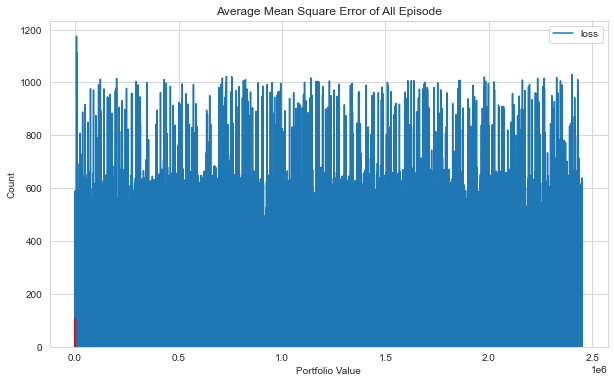

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

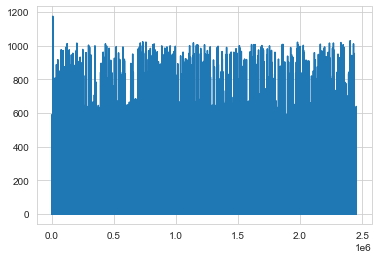

In [5]:
plt.plot(agent.model.losses)

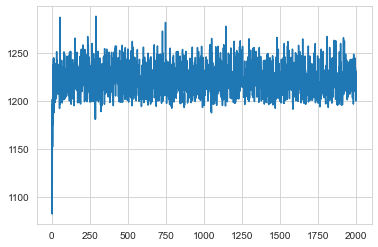

In [6]:
plt.plot(portfolio_value)

episode end value: 1245.81, duration: 0:00:00.109023
Sell: 309 times, Buy: 272 times


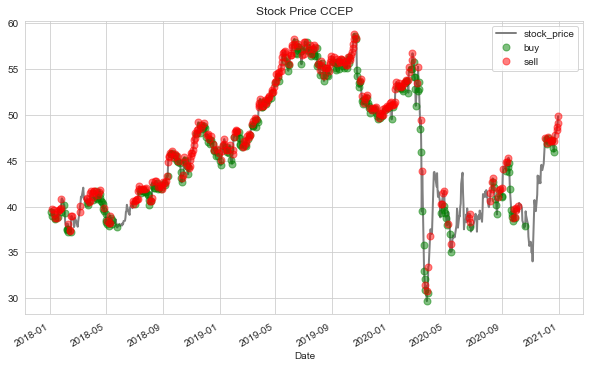

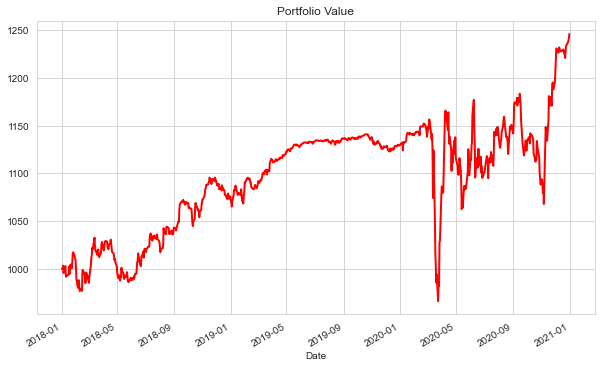

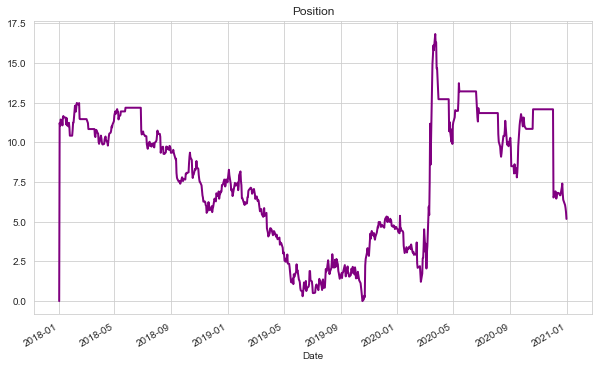

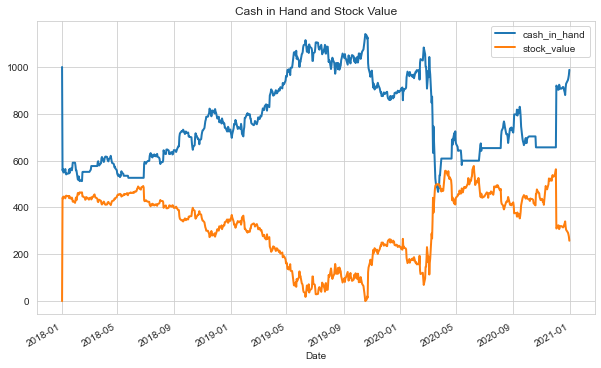

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CCEP
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.60 %
Volatility: 0.1263
shape ratio: 0.5148
Maximun drawdown: -16.43 %
Calmar ratio: 0.4626
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 7.86 %
Volatility (benchmark): 0.3339
shape ratio: 0.2025
Maximun drawdown: -49.45 %
Calmar ratio (benchmark): 0.1590


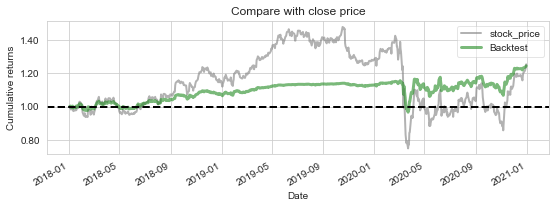

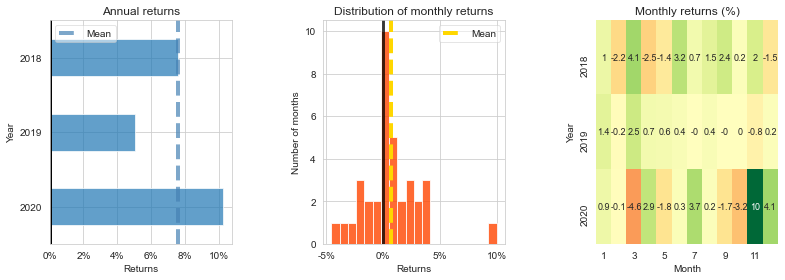

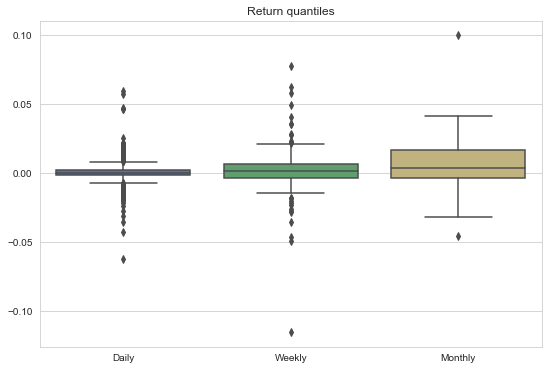

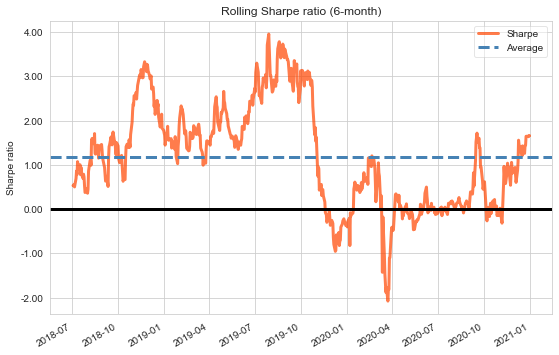

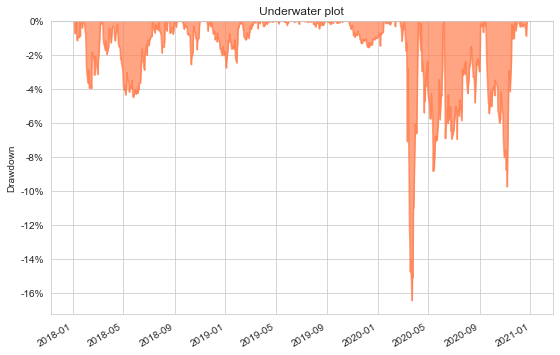

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')